# Markers and Scatter Plots

Another commonly-used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a *dot, circle*, or *other shape*.

----------------------

## Scatter Plots with `plt.plot` and `ax.plot`

In the previous notebook we looked at `plt.plot` and `ax.plot` to produce line plots. It turns out that **plt.plot()** function serves more than one purpose: it can easily produce scatter plots as well:

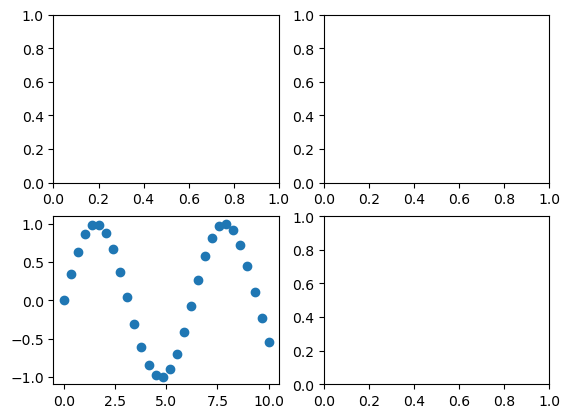

In [90]:
# These are imported in my startup file
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

fig, ax = plt.subplots(2, 2)

x = np.linspace(0, 10, 30)
y = np.sin(x)

ax[1][0].plot(x, y, 'o')

plt.show()

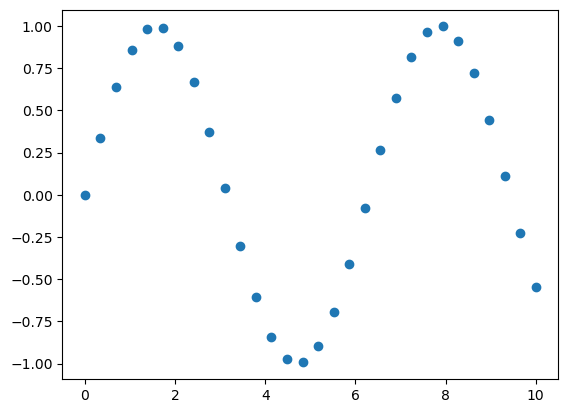

In [91]:
# x = np.linspace(0, 10, 30)
# y = np.sin(x)
plt.plot(x, y, 'o') 
plt.show()

The third argument (`'o'`) in the function call is a character which represents the type of symbol used for the plotting. Just as you can specify `'-'`, `'--'`, etc. to control the line style, the marker style has its own set of short string codes. The full list of available
symbols can be seen in [the documentation of plt.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). Most of the possibilities are fairly intuitive, and I’ll show a number of the more common ones here:

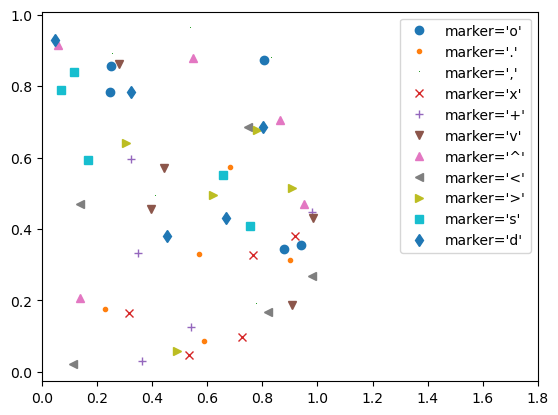

In [92]:
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(np.random.rand(5), np.random.rand(5),
             marker, label="marker='{}'".format(marker))
    
plt.legend() #numpoints=1)
plt.xlim(0, 1.8)
plt.show()

I'm also going to change the marker size with `markersize=20`.

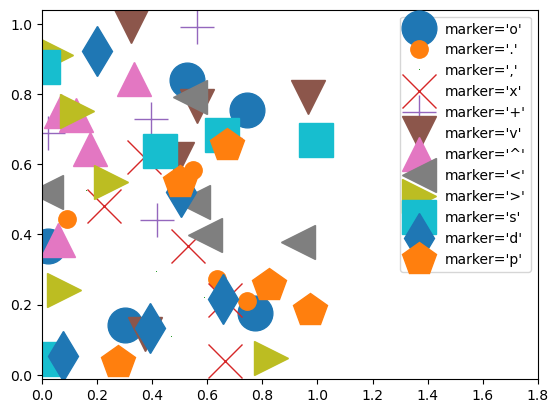

In [93]:
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd', 'p']:
    plt.plot(np.random.rand(5), np.random.rand(5), 
             marker, markersize=25, label="marker='{}'".format(marker))
    
plt.legend(numpoints=1)
plt.xlim(0, 1.8)
plt.show()

*Marker character codes* can also be used together with *line character codes* to plot points along with a line connecting them:

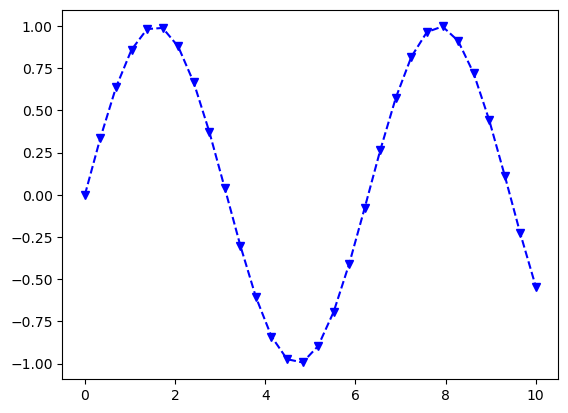

In [94]:
plt.plot(x, y, 'b--v')  # b = blue, -- = dashed line, v = upside down triangle markers
plt.show()

Keyword arguments to the `plt.plot()` function can be used to specify a wide range of properties of the lines and markers:

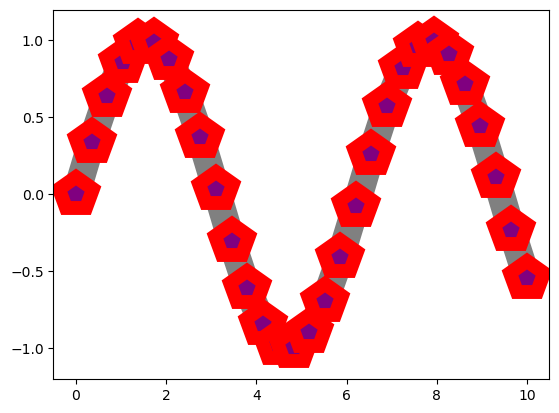

In [95]:
 plt.plot(x, y, '-p', color='gray',
          markersize=25,
          markerfacecolor='purple',
          markeredgecolor='red',
          markeredgewidth=10,
          linewidth=20
         )
plt.ylim(-1.2, 1.2)
plt.show()

and, of course, you can see all the *keyword* options by looking at the Doc String for `plt.plot()`.

In [96]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

### Plot size too small

I find these plots a bit small.

There are a couple of different ways to change the size of your figures.

#### Option 1: `plt.figure(figsize=(Nx, Ny))`

A simple way to change the figure size *in the current cell*, is to begin your plot with 

   `plt.figure(figsize=(Nx, Ny))`
   
where `Nx` and `Ny` are numbers that set the x and y lengths of the figure (in inches)


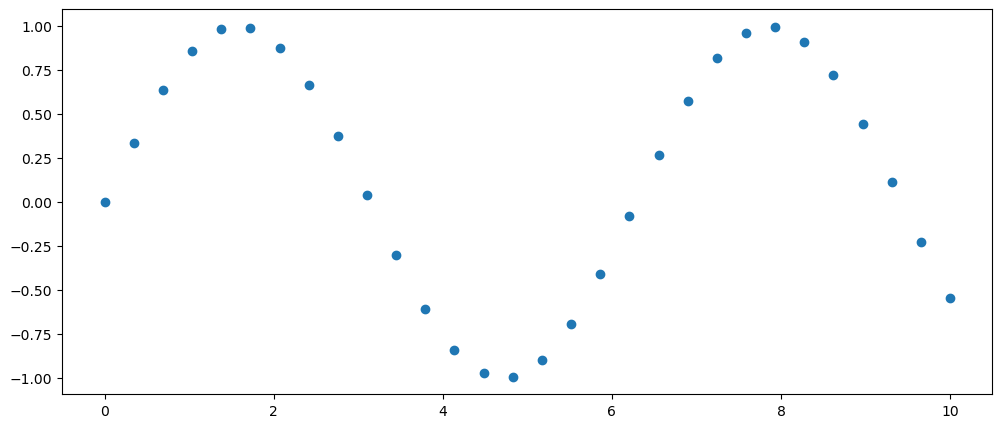

In [97]:
plt.figure(figsize=(12, 5))
plt.plot(x, y, 'o')
plt.show()

This method however, only adjusts the figure size *for the current figure/cell*.

#### Option 2: `mpl.rcParams['figure.figsize'] = (Nx, Ny)`

To set the size of your figures *globally* (for your all the cells in your Jupyter notebook), you can set the matplotlib **rcParams** value (a dictionary that holds global matplotlib configuration data).

First, `import matplotlib as mpl` (mpl is the standard abbreviation for matplotlib).  
We can check what the current global figsize parameters are set to:

In [98]:
import matplotlib as mpl

mpl.rcParams['figure.figsize']

[6.4, 4.8]

and we can *set* the parameters by setting the `mpl.rcParams['figure.figsize']` equal to a tuple with the new parameter values.

In [99]:
mpl.rcParams['figure.figsize'] = (12, 8)

Let's replot the figure from above. Notice the difference?

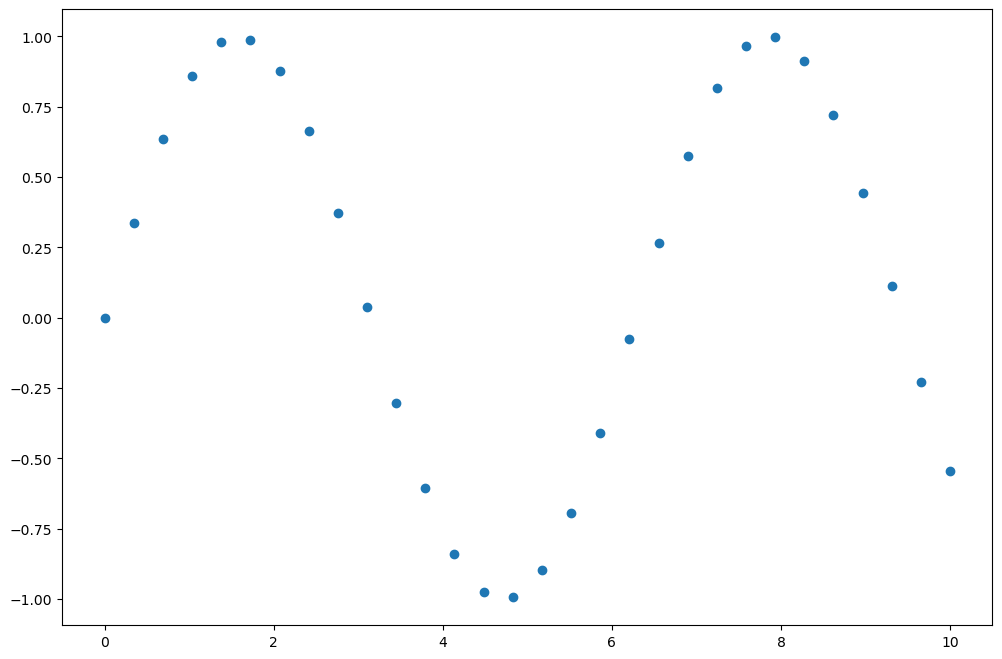

In [100]:
plt.plot(x, y, 'o')
plt.show()

More complete control over the matplotlib parameters is in the file `matplotlibrc` which is located in "`.config/matplotlib/` (on my Linux machine). There you can set all parameters, which are then loaded at startup.

You can read about the `matplotlibrc` startup file in the ["Customizing Matplotlib" docs](http://matplotlib.org/users/customizing.html)

In [101]:
# Resetting global figsize parameters
mpl.rcParams['figure.figsize'] = (6.4, 4.8)

------------------



# Scatter Plots with plt.scatter

A second, *more powerful* method of creating scatterplots is the `plt.scatter()` function,
which can be used very similarly to the `plt.plot` function:

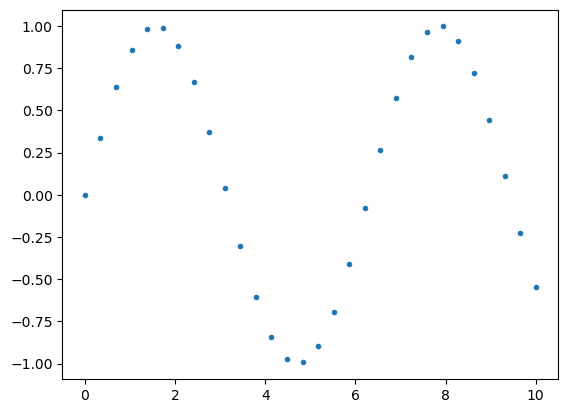

In [102]:
plt.scatter(x, y, marker='.')
plt.show()

The **primary difference** between `plt.scatter()` and `plt.plot()` is that `plt.scatter()` can be used to create
scatter plots where *each individual point has a different size, face color, edge color*, or
*other property*.

Here we create a random scatter plot with points of many colors and sizes.

In order to better see the overlapping results, we’ll also use the **alpha** *keyword* to
adjust the **transparency level**:

In [103]:
sizes = 1000 * np.random.rand(100)
sizes

array([3.75553106e+02, 2.02576496e+02, 1.75067753e+02, 5.01858694e+02,
       9.51220276e+02, 4.93923711e+02, 3.93488277e+02, 4.68410289e+02,
       3.03850301e+02, 2.28453565e+02, 1.73703382e+02, 7.43096864e+02,
       6.75427062e+02, 5.06531728e+02, 8.37183720e+02, 1.63759272e+02,
       6.01800842e+02, 7.81593282e+02, 9.61439047e+02, 7.65147551e+01,
       5.94984932e+02, 2.27173065e+02, 4.66592192e+02, 7.97276477e+02,
       2.23349490e+02, 8.49498623e+02, 8.76935410e+02, 5.21703423e+02,
       8.73054123e+02, 3.95854167e+01, 7.26210654e+02, 7.76625258e+02,
       1.80369383e+02, 5.96173189e-01, 9.44584622e+02, 7.36543489e+02,
       5.87426090e+02, 7.55034150e+02, 8.14798568e+02, 3.86351963e+02,
       7.61173637e+02, 6.90075728e+02, 2.63015136e+02, 9.11184048e+02,
       2.27207277e+02, 9.67839890e+02, 8.95484861e+02, 1.54629823e+02,
       1.59813622e+02, 2.56146379e+02, 8.44248215e+02, 7.30084083e+02,
       8.52154345e+02, 6.25485993e+02, 2.05569278e+02, 6.25048055e+02,
      

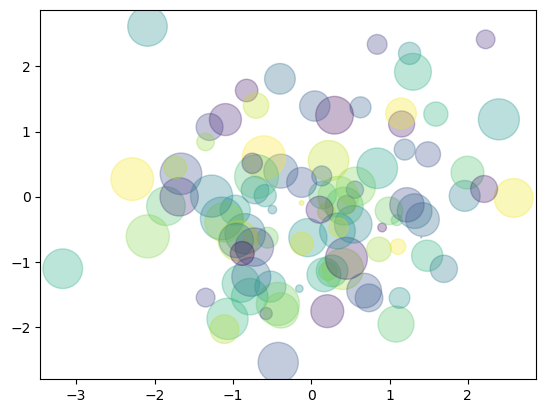

In [104]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.show()

Adjusting the size and color of different points can offer a very useful means of visualizing
multi-dimensional data. 

------------------------------

### Now a more realistic example:

You have probably run into the classic *iris data* from the `scikit-learn` package, where each sample is one of three types of flowers which has the size of its petals and sepals carefully measured.

Here we will plot the *sepal length* and *width* as the $x,y$ coordinates, along with *petal width* corresonding to the size (these are "*features* which are part of the data). Finally, we will color each point according to the specific *iris species* (there are 3 different species) of the flower.

In [105]:
from sklearn.datasets import load_iris

data = load_iris()
features = data.data.T

In [106]:
features

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

In [107]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [108]:
# These are the encoded labels (e.g. the species of each flower)
target_values = data.target
target_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
species_names = data.target_names
species_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [110]:
# Show the mapping of target values to species names
for value in set(target_values):  # Using set to avoid repetition
    print(f"Target value: {value} -> Species name: {species_names[value]}")

Target value: 0 -> Species name: setosa
Target value: 1 -> Species name: versicolor
Target value: 2 -> Species name: virginica


In [111]:
feature_names = data.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [112]:
# First 10 data points [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
data.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [113]:
# An array of data points representing the first feature sepal length (cm)
features[0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

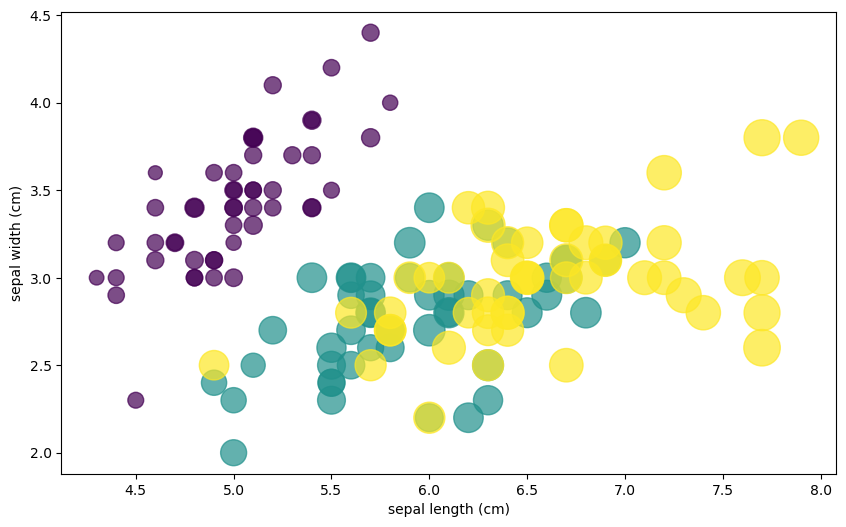

In [114]:
sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]

plt.figure(figsize=(10, 6))
plt.scatter(sepal_length, sepal_width, alpha=0.7, s=100*petal_length, c=target_values)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

**Notice**: This scatter plot has given us the ability to *simultaneously* explore **_four_ different dimensions** of the data set! 

* The **(x, y)** location of each point corresponds to the sepal *length* and *width*; 
* The **size** of the point is related to the *petal width*,
* and the **color** is related to the particular *species* of flower. 

Multi-color and multi-feature scatter plots like this can be extremely useful, for both exploration and presentation of data.

--------------------------

### A Note on Efficiency:  
#### use `plt.plot()` unless you *need* to change *color* and *size* of your markers

Aside from the different marker control features available in `plt.scatter()` and `plt.plot()`, why might
you choose to use one over the other? 

While it doesn’t matter as much for small amounts of data, as datasets get larger than a few thousand points, 
`plt.plot()` can be noticeably more efficient than `plt.scatter()`.

The reason is simple: `plt.scatter()` has the capability to render a different size and/or
color for *each point*. For this reason, the renderer must do the extra work of constructing
each point individually, even when it does not have to. 

In `plt.plot()`, on the other hand, the points are always essentially clones of each other, so the work of
determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance.

For this reason, *when working with larger datasets*:

**`plt.plot()` should be preferred over `plt.scatter()`** 

whenever possible.

-------------------

# Adding Error Bars

For any scientific measurement, accurate accounting for errors is nearly as important,
if not more important, than accurate reporting of the number itself. 

For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant,
the local measurement of the expansion rate of the Universe. I know that the
current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of
74 (km/s)/Mpc with my method. 

Are the values consistent? The only correct answer, given this information, is this: *there is no way to know*.

Suppose I augment this information by reporting the error in my measurement. The current literature suggests a value of
around 71 ± 2.5 (km/s)/Mpc, and my method has measured a value of 74 ± 5 (km/s)/
Mpc. 

Now are the values consistent? Most scientists would say yes.

In visualization of data and results, showing these errors effectively can make a plot
convey much more complete information.

-----------------

## Simple Errorbars

A basic errorbar can be created with a simple matplotlib function call: `errorbar()`, as shown here:


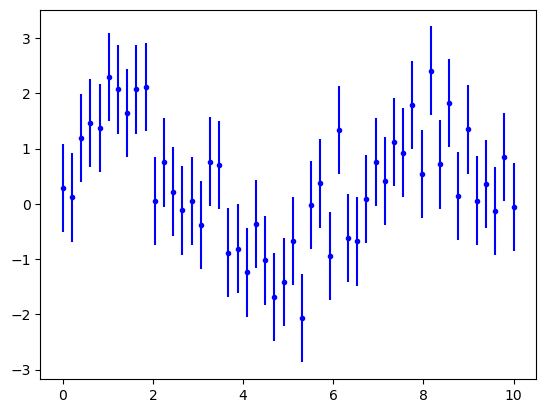

In [115]:
%matplotlib inline
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.b')
plt.show()

In this case, the error on each value is the same (`dy = 0.8`).

The `fmt` keyword is a format code controlling the appearance of lines and points, and has
the same syntax as the shorthand used in `plt.plot()`.

In addition to these basic options, the `errorbar()` function has many options to finetune
the output. 

Using these additional options you can easily customize your errorbar plots according to your own aesthetic.
For example, I often find it helpful, especially in crowded plots, to make the errorbars *lighter* than the points themselves:

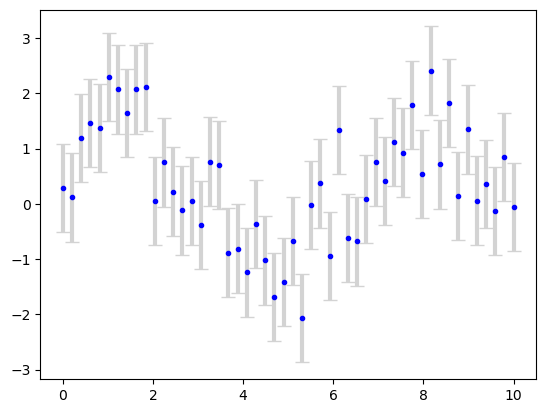

In [116]:
plt.errorbar(x, y, yerr=dy, fmt='.', color='b', ecolor='lightgray', elinewidth=3, capsize=5)
plt.show()

## Continuous Errors

In some situations, it's nice to show errorbars as *continuous quantities*. 

Though matplotlib does not have a built-in convenience routine for this type of application,
it’s relatively easy to combine primitives like `plt.plot()` and `plt.fill_between()` for a
useful result.

Here we’ll perform a simple ***Gaussian Process (GP) Regression***, in the `scikit-learn` toolbag.

This is a method of fitting a very flexible non-parametric function to analyze
data with a continuous measure of the uncertainty. For now, I won’t say
anything more about Gaussian Process Regression, but will focus instead on how one
might visualize such a continuous error measurement.

First:

In [117]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)   # lambda functions are a very quick way to create a function
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gpr = GaussianProcessRegressor()
gpr.fit(xdata[:, None], ydata)

### Note:  100 points set here
xfit = np.linspace(0, 10, 100)

yfit, MSE = gpr.predict(xfit[:, np.newaxis], return_std=True)

dyfit = 2 * np.sqrt(MSE) # 2*sigma ~ 95% confidence region

Ok. Without going into a lot of detail about Gaussian Process Regression, what do I have here?

`xdata` and `ydata` are 5 points which satisfy: $y(x) = x \sin(x)$.

Next, we have `xfit`, `yfit`, and `dyfit`, which represent a *continuous fit* to the space between 
our five data points, and an error estimate `dyfit`. They are represented by the 1000 `xfit, yfit`, and `dyfit` points 

We could pass these to the `plt.errorbar()` function as above, but we don’t really want to
plot 100 points with 100 errorbars. Instead, we can use the `plt.fill_between()`
function with a *light color* to visualize this continuous error:

--------------------------




The `plt.errorbar()` method would have been uglier.

I have to plot 1000 errorbar points, then put the 5 red known data points on top. 

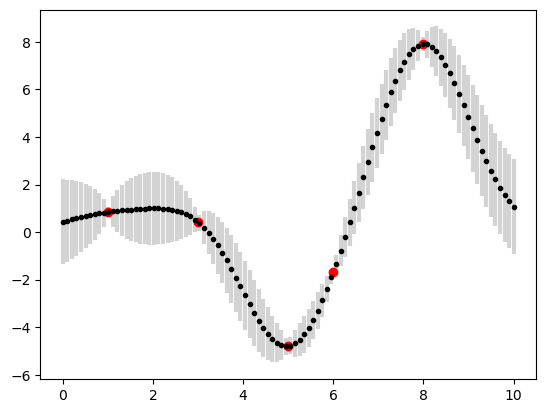

In [118]:
plt.errorbar(xfit, yfit, yerr=dyfit, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot(xdata,ydata, 'or')
plt.show()

### Using `plt.fill_between`

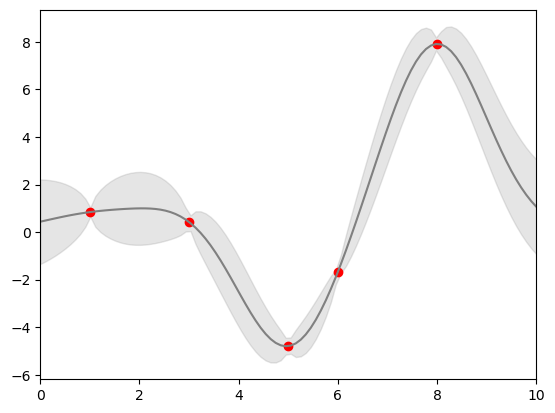

In [119]:
# Visualize the result
plt.plot(xdata, ydata, 'or')  # <--- marker type 'o', color 'r'
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2) # <--can you intuit how this function works?
plt.xlim(0, 10)
plt.show()

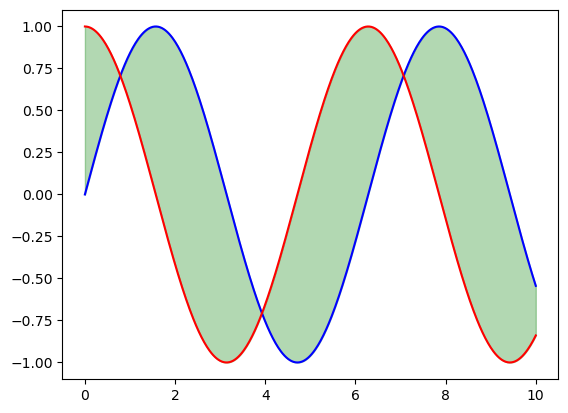

In [120]:
x = np.linspace(0,10,500)
ymin = np.sin(x)
ymax = np.cos(x)

plt.plot(x, ymin, "-b")
plt.plot(x, ymax, "-r")

plt.fill_between(x, ymin, ymax, color="g", alpha=0.3)
#plt.axis('off')
plt.show()

Note what we’ve done here with the `fill_between()` function: we pass an $x$ value, then
the *lower* $y$-bound, then the *upper* $y$-bound, and the result is that the area between
these regions is filled.

The figure then gives a very intuitive view into what the *Gaussian Process
Regression* algorithm is doing: in regions near a *measured* data point, the model is
strongly constrained and this is reflected in the small model errors. In regions far
from a measured data point, the model is not strongly constrained, and the model
errors increase.

### Another example of using `plt.fill_between`

From: https://towardsdatascience.com/the-gaussian-model-4a94a2b3ff1b

In [121]:
from scipy.special import erf, erfinv
#See: https://en.wikipedia.org/wiki/Normal_distribution

def phi(x): return 0.5*(1 + erf(x/np.sqrt(2)))
def phiinv(A): return np.sqrt(2)*erfinv(2*A-1)
def gauss(x): return np.exp(-x**2/2)/np.sqrt(2*np.pi)

def bump(x, x0, N, a):
    return N*np.exp(-(x-x0)**2/2/a**2)

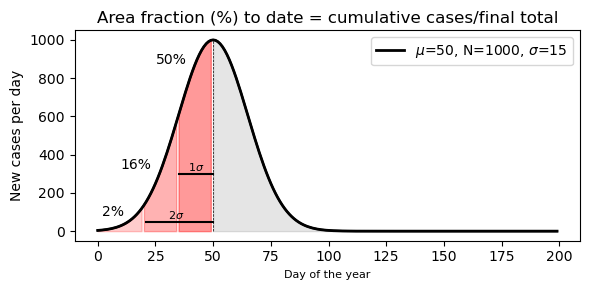

In [122]:
%matplotlib inline

mu = 50
N = 1000
sigma = 15

x = np.arange(200)
y = bump(x, 50, 1000, 15)

plt.figure(figsize=(6,3))

plt.plot(x,y,'-k', linewidth=2, label=r'$\mu$=50, N=1000, $\sigma$=15')

A1 = 0.02
s1 = phiinv(A1)
sN1 = sigma*phiinv(A1) + mu

A2 = 0.15
s2 = phiinv(A2)
sN2 = sigma*phiinv(A2) + mu

#                                                                                                                                                                                                                                                                                                                                                                                                                                                                 print(sN)

#x = np.linspace(-5,5, 100)
#y = gauss(x) 
plt.plot(x, y, '-k')
y2 = -1*np.ones(100)
plt.fill_between(x, 0, y, where=x < sN1, color='r', alpha=0.2)
plt.fill_between(x, 0, y, where=(x>sN1)&(x<sN2), color='r', alpha=0.3)
plt.fill_between(x, 0, y, where=(x>sN2)&(x<mu), color='r', alpha=0.4)
plt.fill_between(x, 0, y, where=x >= mu, color='k', alpha=0.1)

plt.plot([mu,mu],[0,N],'k--',linewidth=0.5)

plt.plot([mu-sigma, mu], [300,300], 'k-')
plt.text(mu-sigma/2, 314, r"1$\sigma$", ha='center', fontsize=8)

plt.plot([mu-2*sigma+1, mu], [50,50], 'k-')
plt.text(mu-2*sigma/2-1, 65, r"2$\sigma$", ha='center', fontsize=8)

plt.text(2,80,"2%")
plt.text(10,325,"16%")
plt.text(25,875,"50%")

#plt.title('Area up to day {:.0f} = {:0.0f}% of total'.format(sN, 100*phi(s)))
plt.title('Area fraction (%) to date = cumulative cases/final total')

#plt.plot([50-d, 50+d], [100,100], 'r-')
#plt.text(95, 90, r'10% of peak')
#plt.text(55, 125, r'$\sim 4\sigma$')
#plt.plot([25,25], [0,1000], '-b')
#plt.text(17, 500, "N")
#plt.plot([50,50], [-20,20], '-g')
#plt.plot([0,200], [0,0], '--k', alpha=0.4)
#plt.ylim(-100,1200)
#plt.text(48,40, '$\mu$')
#plt.title("Gaussian Model Parameters")
plt.ylabel("New cases per day")
plt.xlabel("Day of the year", fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()